#### Paper data and plots

This notebook plots the data presented in the paper 'Compare the Pair: Rotated vs. Unrotated Surface Codes at Equal Logical Error Rates' by importing the already-collected data and plotting it. For an example of how to generate this data before plotting it see 'example.ipynb'.

##### Requirements

In [698]:
# pip install stim      # Stim: a stabiliser circuit simulator

In [699]:
# pip install sinter==1.13.0     # Sinter: for bulk sampling of stim circuits

In [700]:
import sinter
import stim

import os
import sys
import pickle

sys.path.insert(0, 'functions') 
import morefuncs as morefuncs
import com_funcs5 as funcs

# Update with any changes to these files:
from importlib import reload
reload(morefuncs)
reload(funcs);

##### Import the collected data:

In [701]:
reload(funcs)

noise_model = 'SD' # choices are SD (standard / uniform depolarising) and CXSI (superconducting-inspired CNOT-compiled)

mylist = funcs.give_stats_list(noise_model)

pvalues = funcs.give_p_values(noise_model)

In [702]:
reload(funcs)
# for stat in mylist: print(el) # print out every entry

# # bin the CNOT orders to decide which ones to plot:
roorders, unroorders = funcs.bin_CNOT_orders(mylist) # print out CNOT orders 

Rotated code CNOT orders:
32013021

Unrotated code CNOT orders:
12031203
21302130
10231203
23102130


##### Threshold plots: $p_L$ vs. $p$

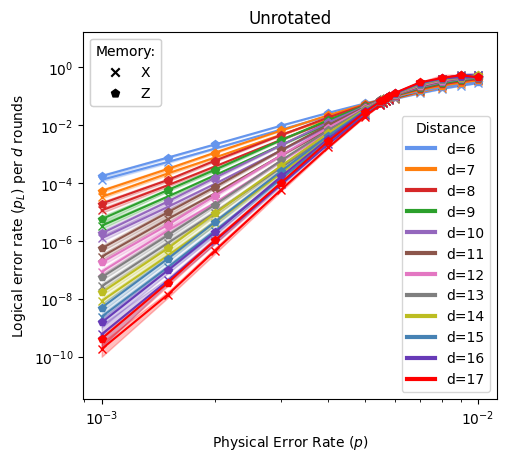

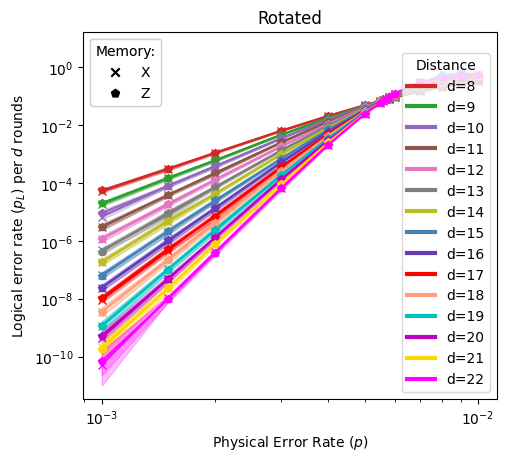

In [703]:
# python:
reload(funcs)

roorder = roorders[0] 
unroorder = 10231203 if noise_model == 'SD' else 12031203

funcs.plot_thresholds(mylist, roorder, unroorder, romind = 8, unromind = 6)

##### Fit to scaling function $p_L = \alpha ( p / \beta)^{\gamma d + \delta}$

In [704]:
# for stat in mylist:
#     if stat.json_metadata['ro'] == 'unro' and stat.json_metadata['b'] == 'z' and stat.json_metadata['d'] > 16:
#         print(stat)

<IPython.core.display.Math object>


distances = combined

unro z 10231203

    α = 0.080 ± 0.008
    β = 0.00539 ± 0.00002
    γ = 0.700 ± 0.008
    δ = 0.65 ± 0.10


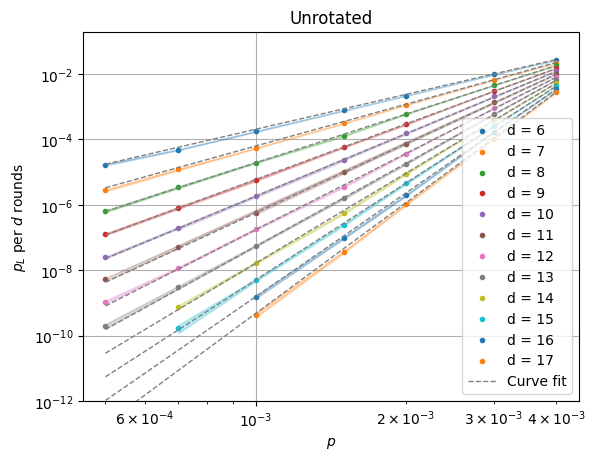


ro z 32013021

    α = 0.078 ± 0.009
    β = 0.00529 ± 0.00003
    γ = 0.578 ± 0.006
    δ = 0.27 ± 0.09


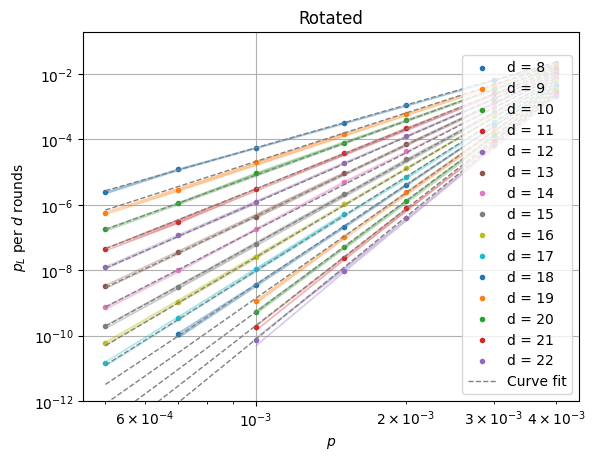

In [705]:
reload(funcs)

distances = 'combined' # choices are 'odd', 'even' or 'combined'
b = 'z' # choices are x or z 

funcs.fit_scaling_and_plot(mylist, distances, b, roorder, unroorder, romind = 8, unromind = 6)

##### Plot as $p_L$ vs. $\sqrt{n}$

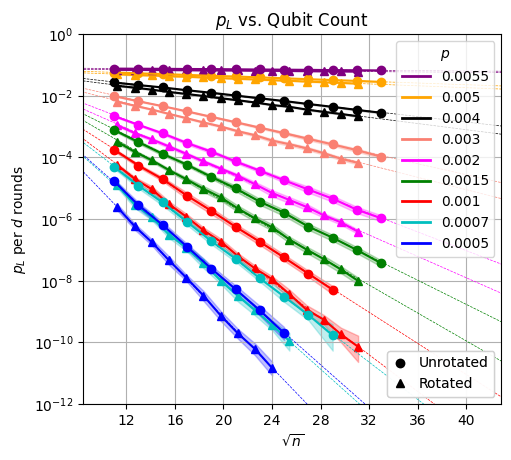

In [706]:
reload(funcs)

b = 'z' 

funcs.plot_pL_vs_qubit_count(mylist, b, roorder, unroorder, ps = pvalues, romind = 8, unromind = 6)

##### Plot 'teraquop' count :$\ $ the number of qubits required to reach $p_L = 10^{-12}$

<IPython.core.display.Math object>

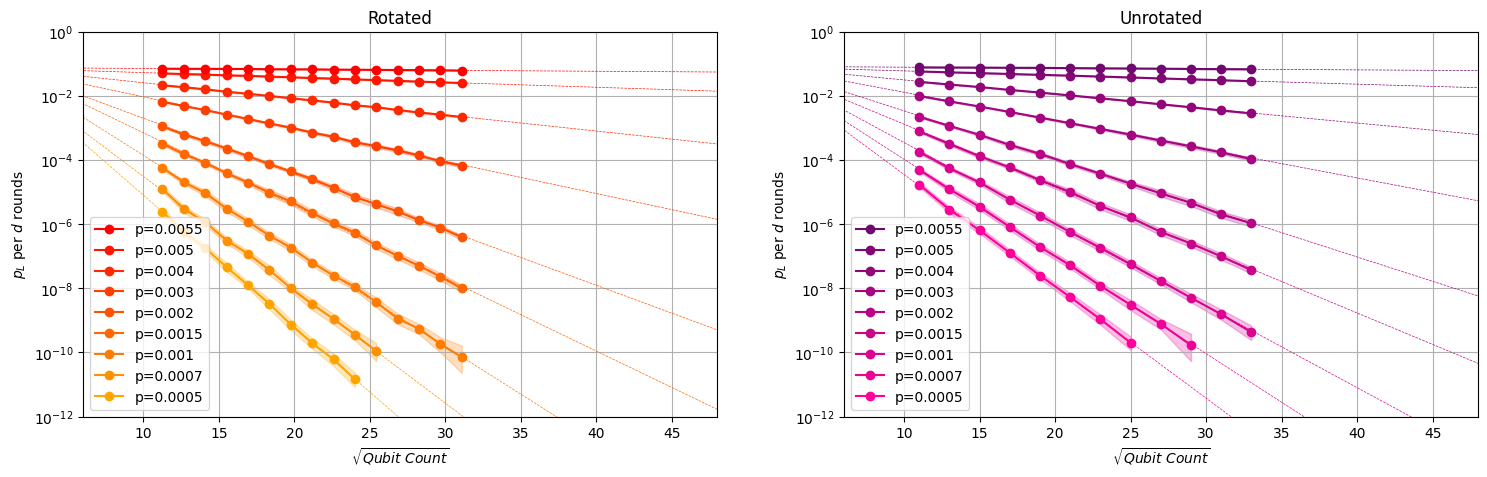

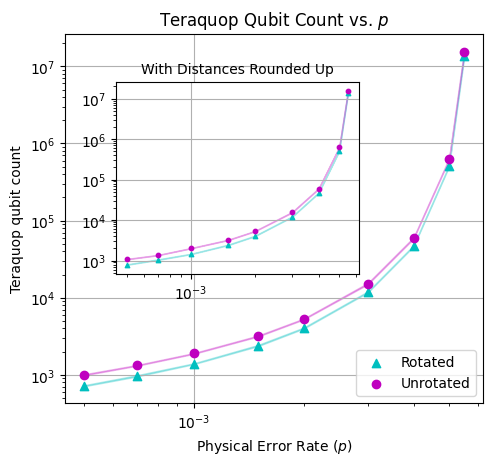

In [707]:
reload(funcs)

b = 'z' 

funcs.plot_teraquop(mylist, b, roorder, unroorder, ps = pvalues, teraquop_inset = True, romind = 8, unromind = 6, optional_plot = True)

##### Plot ratios of qubit counts vs. $p_L$

This is the projected number of qubits used by the rotated surface code divided by the number of qubits used by the unrotated surface code to achieve the same $p_L$

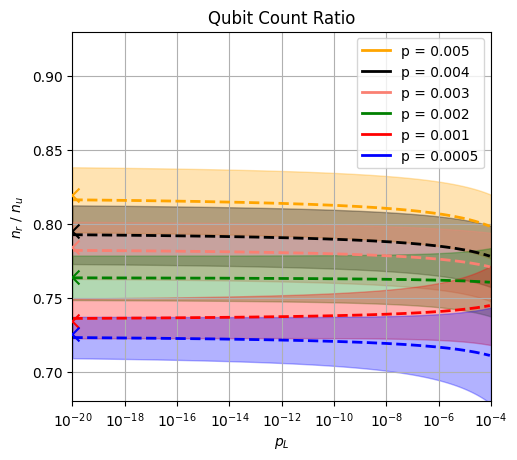

In [710]:
reload(funcs)

b = 'z'

funcs.plot_ratio(mylist, b, roorder, unroorder, romind = 8, unromind = 6, ps = [0.0005, 0.001, 0.002, 0.003,0.004,0.005], paper_ylims = True)

##### Memory time vs. $\sqrt{n}$

This is a reformulation of the $p_L$ vs. $\sqrt{n}$ plots above, converting the $p_L$ per $d$ rounds to be the length of time (assuming one stabiliser measurement cycle take a microsecond) before $p_L$ over the entire shot of the memory experiment equals $p$.

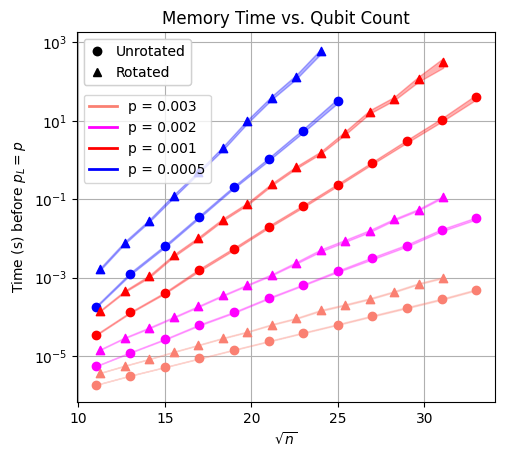

In [709]:
reload(funcs)

b = 'z'

funcs.plot_memory_times(mylist, b, roorder, unroorder, ps = [0.0005, 0.001, 0.002, 0.003], romind = 8, unromind = 6)